## PI Estimator

Nama : Irfan Imaduddin <br>
Tanggal : 4 Februari 2021<br>
Versi : 1.0<br>
Kontak : irfanimaduddin[at]gmail.com<br>

---

Misal, terdapat sebuah lingkaran di dalam sebuah bujur sangkar seperti gambar di bawah ini. Diameter lingkaran sama dengan panjang sisi bujur sangkar tersebut, yaitu $s$.

<img src="circle_pi.png" width="300" height="300"> <br>

maka nisbah antar luas kedua bidang itu sama dengan $\pi$ seperti pada persamaan berikut:

$\frac{{\pi}r^2}{4r^2} = \frac{\pi}{4}$ <br>

di mana $r = s/2$. Jika kita melempar bola secara acak pada kedua bidang tersebut, kita dapat menghitung bola yang berada di dalam maupun di luar bidang lingkaran berdasarkan posisinya. Nisbah jumlah bola yang berada di dalam lingkaran terhadap jumlah total bola yang dilemparkan dapat memenuhi hubungan ${\pi}/4$ tersebut. Jika bola yang dilemparkan secara acak, maka hubungan tersebut berubah menjadi probabilitas. Semakin banyak bola yang dilemparkan, maka nilai $\pi$ yang terhitung akan semakin mendekati nilai yang konvensional. Maka dari itu, nilai $\pi$ dapat dikatakan bisa diestimasi menggunakan hubungan di bawah ini:<br>

${\pi} \ {\approx} \ 4\frac{N_{circ}}{N_{tot}}$

Pada kesempatan ini, dibuat sebuah program yang berusaha untuk mengestimasi nilai $\pi$ dari banyaknya bola yang dilempar secara acak. Jumlah bola dapat dimasukkan setelah menjalankan program. Akan muncul permintaan mengisi jumlah bola dalam <b>integer</b> yang akan dilemparkan secara acak sebagai inputnya. Sebagai luarannya, akan muncul nilai $\pi$ yang diestimasi berdasarkan nisbah bola yang berada di dalam lingkaran terhadap total bola dalam fungsi jumlah bola yang sedang dilemparkan. Selain itu, akan muncul juga perbandingan antara nilai $\pi$ yang diestimasi terhadap $\pi$ yang sebenarnya sebagai fungsi jumlah bola yang sedang dilemparkan juga. Terakhir, akan muncul posisi dari setiap bola yang dilemparkan secara acak dalam koordinat <b>x</b> dan <b>y</b> untuk memastikan posisi setiap bola. <br>

---

Import necessary modules

In [1]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

Calculate PI with Monte Carlo approach

Input particle number (integer) 10000


Text(0, 0.5, 'y')

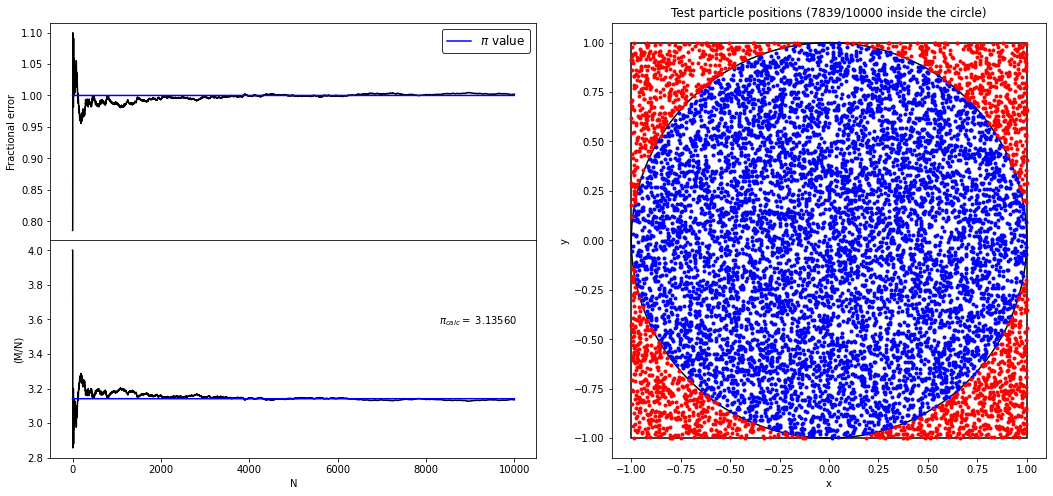

In [3]:
# Input number of test particles
test_num = int(input("Input particle number (integer)"))

# Generate test particles
count = np.arange(0, test_num, 1)

# Generate random test particle positions
test_pos = np.random.rand(test_num,2)*2 - 1

# Define some arrays
circ_x, circ_y, square_x, square_y = [], [], [], []
n_to_m, frac_ratio, frac_fit, pi_fit = [], [], [], []
N, M = 0, 0

# Calculate number of particles inside the circle and PI values
for i in range(len(test_pos)):
    M = M + 1
    test = np.sqrt((test_pos[i][0]**2) + (test_pos[i][1]**2))
    if test<1.:
        N = N + 1
        circ_x.append(test_pos[i][0])
        circ_y.append(test_pos[i][1])
    else:
        square_x.append(test_pos[i][0])
        square_y.append(test_pos[i][1])
        
    n_to_m_rat = 4*N/M
    n_to_m.append(n_to_m_rat)
    
    try:
        frac_ratio.append(np.pi/n_to_m_rat)
    except ZeroDivisionError:
        frac_ratio.append(0)
        
    frac_fit.append(1.)
    pi_fit.append(np.pi)
    
    
# Plot the result of PI values
fig = plt.figure(constrained_layout=False, figsize=(18,8))
gs1 = fig.add_gridspec(nrows=2, ncols=1, right=0.5, hspace=0., wspace=0.5)
ax1 = fig.add_subplot(gs1[:-1, :])
ax1.plot(count, frac_ratio, 'k')
ax1.plot(count, frac_fit, color='blue', label=r'$\pi$ value')
ax1.set_ylabel("Fractional error")
ax1.legend(fontsize=12, edgecolor='black')

ax2 = fig.add_subplot(gs1[-1, :])
ax2.plot(count, n_to_m, 'k')
ax2.plot(count, pi_fit, color='blue')
ax2.set_ylabel("(M/N)")

ax2.set_xlabel("N")

# Find best location for annotation
if np.pi < ((max(n_to_m)+min(n_to_m))/2.):
    best_annot = 75
else:
    best_annot = -75
            
ax2.annotate(r'$\pi_{calc} =$ %.5f' %(n_to_m_rat),
            xy=(test_num, np.pi), xycoords='data',
            xytext=(-75, best_annot), textcoords='offset pixels')

# Plot the position of test particles
gs2 = fig.add_gridspec(nrows=2, ncols=3, left=0.475, right=1.25)
ax3 = fig.add_subplot(gs2[:, :-1])
draw_circle = plt.Circle((0., 0.), 1., fill=False, lw=1.5)
draw_square = plt.Rectangle((-1., -1.), 2., 2., fill=False, lw=1.5)

plt.plot(circ_x, circ_y, '.', color='blue')
plt.plot(square_x, square_y, '.', color='red')

ax3.set_aspect(1)
ax3.add_artist(draw_circle)
ax3.add_artist(draw_square)
ax3.set_title('Test particle positions (%d/%d inside the circle)' %(N, test_num))
ax3.set_xlabel("x")
ax3.set_ylabel("y")